### Ma. Christina Kane Vito

<h1> <center> CMSC 197 Problem Set <br> Implementing Linear Regression with <br> Gradient Descent as Optimization Function </center></h1>

github link: https://github.com/Kanedykane/CMSC197.git

## Import libraries

In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, scale

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

## Load Advertising.csv dataset using pandas

In [6]:
# Read the CSV file
df = pd.read_csv('Advertising.csv')

# View the first 5 rows
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Standardize each column of the dataset

In [8]:
# Extract predictors (TV, Radio, Newspaper)
X = df[['TV', 'Radio', 'Newspaper']]

# Define the target variable
y = df['Sales'].values.reshape(-1, 1)  # Make sure y is a column vector

# Standardize the predictors
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert back to DataFrame to keep column labels
X_standardized = pd.DataFrame(X_standardized, columns=['TV', 'Radio', 'Newspaper'])

# View standardized data
X_standardized.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


## Add an extra column composing of all ones to X

In [10]:
# Add a column of ones
X_standardized['Bias'] = 1

# Reorder columns if needed, placing 'Bias' first
X_standardized = X_standardized[['Bias', 'TV', 'Radio', 'Newspaper']]

# View the data
X_standardized.head()

,Bias,TV,Radio,Newspaper
0,1,0.969852,0.981522,1.778945
1,1,-1.197376,1.082808,0.669579
2,1,-1.516155,1.528463,1.783549
3,1,0.052050,1.217855,1.286405
4,1,0.394182,-0.841614,1.281802


## Divide the dataset into training and testing, with 0.85 and 0.15 ratio, respectively.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.15, random_state=42)

print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("\nX_test size:", X_test.shape)
print("y_test size:", y_test.shape)

X_train size: (170, 4)
y_train size: (170, 1)

X_test size: (30, 4)
y_test size: (30, 1)


## Fit the model on the training set.

In [14]:
def initialize_weights(input_size):
    np.random.seed(42)
    weights = np.random.uniform(0, 1, size=(input_size, 1))
    print("Initial weights:", weights.flatten())  # Display initial weights
    return weights

# Initialize weights
weights = initialize_weights(X_train.shape[1])

Initial weights: [0.37454012 0.95071431 0.73199394 0.59865848]


In [15]:
def predict(X, weights):
    predictions = np.dot(X, weights)
    print("Predictions shape:", predictions.shape)  # Display shape of predictions
    return predictions

# Predict for training set
y_train_pred = predict(X_train, weights)

Predictions shape: (170, 1)


In [16]:
def compute_cost(X, y, weights):
    predictions = predict(X, weights)
    m = y.shape[0]
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    print(f"Cost: {cost}")  # Display cost
    return cost

# Compute cost for training set
train_cost = compute_cost(X_train, y_train, weights)

Predictions shape: (170, 1)
Cost: 101.77391586916235


In [17]:
def compute_gradient(X, y, weights):
    m = y.shape[0]
    predictions = predict(X, weights)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    print("Gradient shape:", gradient.shape)  # Display shape of gradient
    return gradient

# Compute gradient for training set
gradient = compute_gradient(X_train, y_train, weights)

Predictions shape: (170, 1)
Gradient shape: (4, 1)


In [18]:
def update_weights(weights, learning_rate, gradient):
    updated_weights = weights - learning_rate * gradient
    print("Updated weights:", updated_weights.flatten())  # Display updated weights
    return updated_weights

# Update weights example
learning_rate = 0.01
weights = update_weights(weights, learning_rate, gradient)

Updated weights: [0.51179661 0.9844498  0.74983623 0.59873772]


In [19]:
def grad_descent(X, y, weights, learning_rate, num_iterations):
    cost_history = []
    weights_history = []

    for i in range(num_iterations):
        gradient = compute_gradient(X, y, weights)
        weights = update_weights(weights, learning_rate, gradient)
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        weights_history.append(weights.copy())

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return weights, cost_history

# Run gradient descent
num_iterations = 1000
weights, cost_history = grad_descent(X_train, y_train, weights, learning_rate, num_iterations)

Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [0.64767223 1.01779981 0.76750378 0.59877199]
Predictions shape: (170, 1)
Cost: 97.77604103273583
Iteration 0: Cost = 97.77604103273583
Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [0.78218086 1.05076869 0.78499848 0.59876214]
Predictions shape: (170, 1)
Cost: 95.83735431924087
Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [0.91533627 1.08336073 0.80232221 0.59870899]
Predictions shape: (170, 1)
Cost: 93.93775470202904
Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [1.04715209 1.11558016 0.81947682 0.59861338]
Predictions shape: (170, 1)
Cost: 92.07645261867663
Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [1.17764178 1.14743119 0.83646415 0.5984761 ]
Predictions shape: (170, 1)
Cost: 90.25267448295811
Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [1.30681871 1.17891796 0.85328599 0.59829795]
Predictions shape:

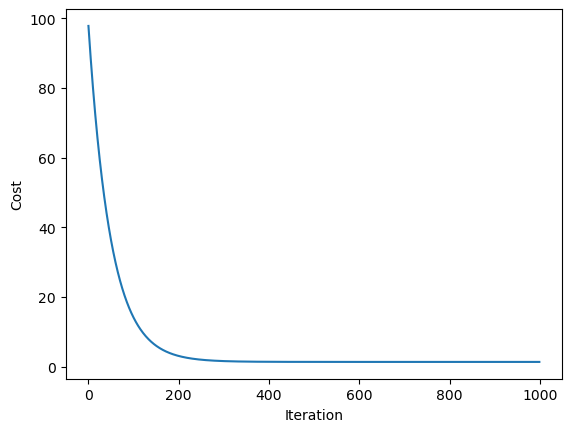

In [20]:
def plot_costs(cost_history):
    plt.plot(cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()

# Plot costs
plot_costs(cost_history)

## Predict the quantitative response y on the train set.

In [22]:
# Predict on the training set
y_train_pred = predict(X_train, weights)

# Compute MSE for training set
train_cost = compute_cost(X_train, y_train, weights)
print(f"Train Cost (MSE): {train_cost}")

Predictions shape: (170, 1)
Predictions shape: (170, 1)
Cost: 1.390486066574998
Train Cost (MSE): 1.390486066574998


## Predict the quantitative response y on the test set.

In [24]:
# Predict on the test set
y_test_pred = predict(X_test, weights)

# Compute MSE for test set
test_cost = compute_cost(X_test, y_test, weights)
print(f"Test Cost (MSE): {test_cost}")

Predictions shape: (30, 1)
Predictions shape: (30, 1)
Cost: 1.4275029094022158
Test Cost (MSE): 1.4275029094022158


## Revert back a standardized data into the original form.

In [26]:
# Revert predicted y values back to original scale for comparison
mean_y = y_train.mean()
std_y = y_train.std()

# Revert the training predictions back to the original scale
y_train_pred_original = y_train_pred * std_y + mean_y

# Revert the test predictions back to the original scale
y_test_pred_original = y_test_pred * std_y + mean_y

# Show first 5 reverted predictions for training and test sets
print("Reverted training predictions (first 5):\n", y_train_pred_original[:5])
print("Reverted test predictions (first 5):\n", y_test_pred_original[:5])

Reverted training predictions (first 5):
 [[ 77.98401395]
 [ 65.27291705]
 [123.01951104]
 [ 75.95367565]
 [107.47949296]]
Reverted test predictions (first 5):
 [[ 97.68825565]
 [120.54757924]
 [124.16965645]
 [ 68.00971331]
 [127.27615616]]


## QUESTIONS

## 1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:

In [29]:
final_weights = weights.flatten()
print("Optimal weights:", final_weights)

def linear_model(X):
    return final_weights[0] + final_weights[1] * X[:, 0] + final_weights[2] * X[:, 1] + final_weights[3] * X[:, 2]

print("Linear Model: h0(x) = {:.4f} + {:.4f} * TV + {:.4f} * Radio + {:.4f} * Newspaper".format(*final_weights))

Optimal weights: [14.02423511  3.83787888  2.78818659  0.01966787]
Linear Model: h0(x) = 14.0242 + 3.8379 * TV + 2.7882 * Radio + 0.0197 * Newspaper


As we can see in the linear model above, the TV has the highest weight compared to the other two and the Newspaper has the lowest weight. Therefore, we can conclude that the TV has the largest impact and Newspaper has the least impact on Sales.

## 2. Provide a scatter plot of the y_hat and y for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn).

Predictions shape: (170,)
Predictions shape: (30,)


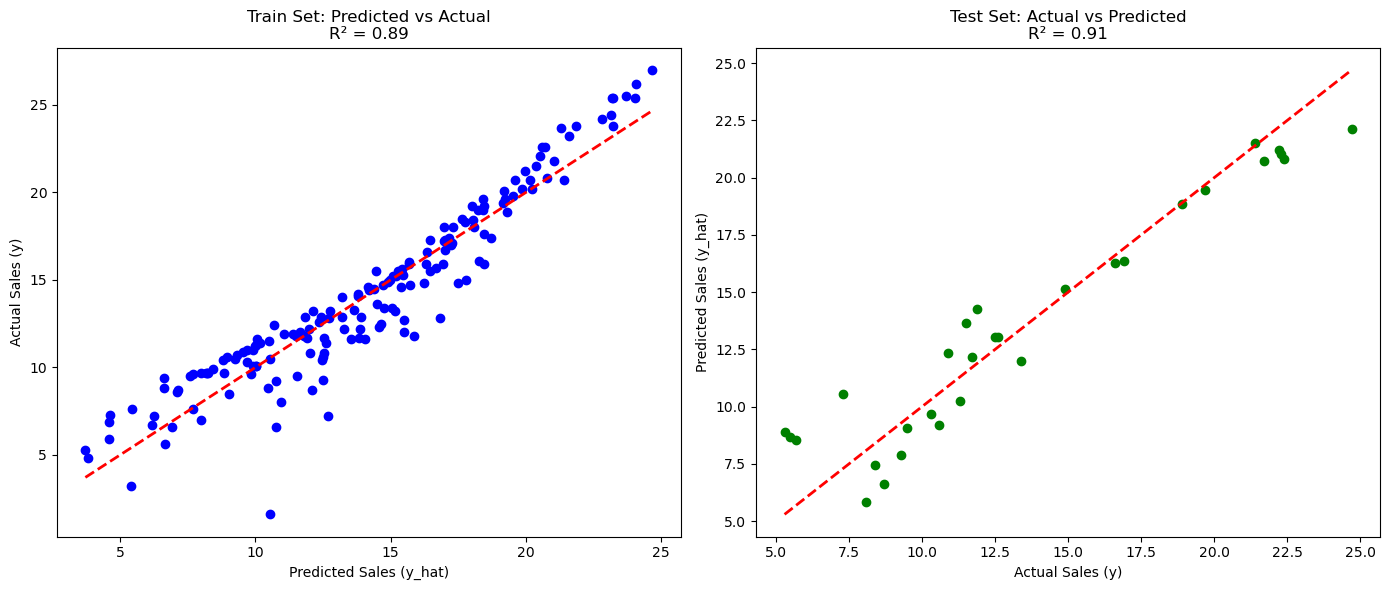

R² score for the train set: 0.89
R² score for the test set: 0.91


In [32]:
# Predict the values for the train and test sets
y_train_pred = predict(X_train, final_weights)
y_test_pred = predict(X_test, final_weights)

# Compute the R² score for both the train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Plot for train set: Actual vs Predicted
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, y_train, color='blue')
plt.plot([y_train_pred.min(), y_train_pred.max()], [y_train_pred.min(), y_train_pred.max()], '--r', lw=2)  # Line showing perfect prediction
plt.title(f'Train Set: Predicted vs Actual\nR² = {r2_train:.2f}')
plt.xlabel('Predicted Sales (y_hat)')
plt.ylabel('Actual Sales (y)')

# Plot for test set: Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # Line showing perfect prediction
plt.title(f'Test Set: Actual vs Predicted\nR² = {r2_test:.2f}')
plt.xlabel('Actual Sales (y)')
plt.ylabel('Predicted Sales (y_hat)')

# Show both plots side by side
plt.tight_layout()
plt.show()

# Print the R² scores
print(f"R² score for the train set: {r2_train:.2f}")
print(f"R² score for the test set: {r2_test:.2f}")

Both the train and test set plots show a linear line suggesting that when actual sales increase, so do the predicted sales (they also increase). Additionally, the fact that the data points are not overly dispersed suggests that, with the exception of a few outliers, the gradient descent model generates a reasonable estimate of the response variable y (sales).

## 3. What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [14.02424065  3.83787733  2.78820402  0.01964867]
Predictions shape: (170, 1)
Cost: 1.390485996227818
Predictions shape: (170, 1)
Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [14.02424613  3.8378758   2.78822135  0.01962958]
Predictions shape: (170, 1)
Cost: 1.3904859267254788
Predictions shape: (170, 1)
Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [14.02425156  3.83787428  2.78823858  0.0196106 ]
Predictions shape: (170, 1)
Cost: 1.3904858580576176
Predictions shape: (170, 1)
Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [14.02425693  3.83787276  2.7882557   0.01959173]
Predictions shape: (170, 1)
Cost: 1.3904857902140035
Predictions shape: (170, 1)
Predictions shape: (170, 1)
Gradient shape: (4, 1)
Updated weights: [14.02426225  3.83787126  2.78827272  0.01957297]
Predictions shape: (170, 1)
Cost: 1.390485723184536
Predictions shape: (170, 1)
Predict

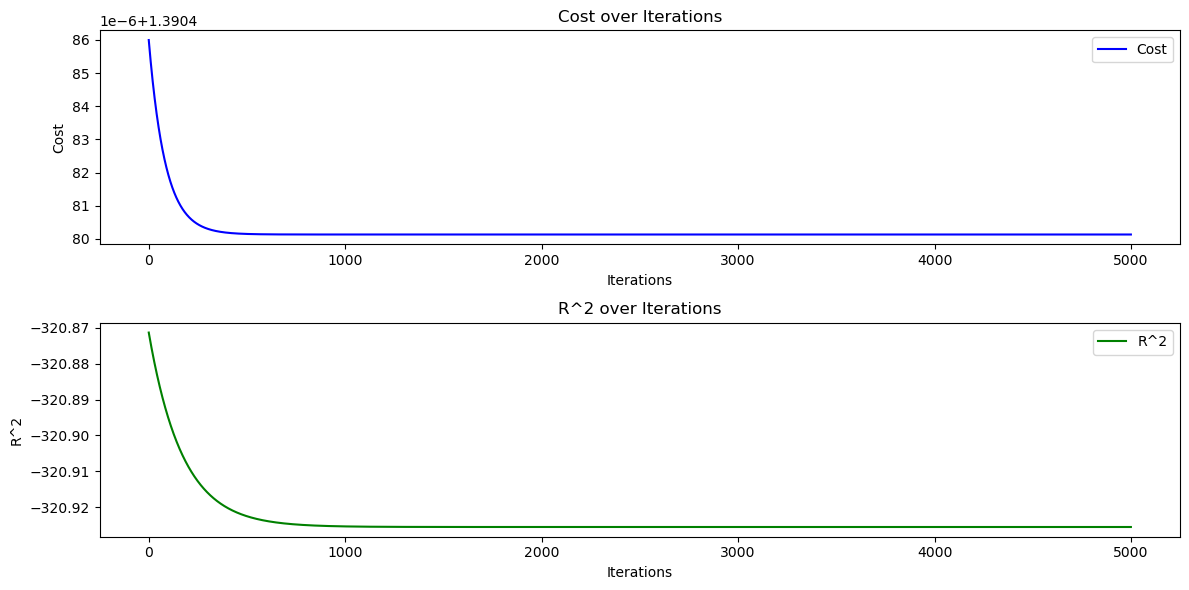

In [35]:
# Gradient descent with tracking
def grad_descent_with_tracking(X_standardized, y, initialize_weights, learning_rate, iterations):
    cost_history = []
    mse_history = []
    r2_history = []

    for i in range(iterations):
        gradients = compute_gradient(X_standardized, y, initialize_weights)
        initialize_weights = update_weights(initialize_weights, gradients, learning_rate)

        cost = compute_cost(X_standardized, y, initialize_weights)
        cost_history.append(cost)

        predictions = predict(X_standardized, initialize_weights)

        # Calculate R²
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - predictions.flatten()) ** 2)  # Flatten predictions for R² calculation
        r2 = 1 - (ss_residual / ss_total)
        r2_history.append(r2)

    return initialize_weights, cost_history, r2_history

# Set parameters
iterations = 5000
learning_rate = 0.01

# Call the modified grad_descent_with_tracking function
final_weights, cost_history, r2_history = grad_descent_with_tracking(X_train, y_train, weights, learning_rate, iterations)

# Plot the cost and R² history over iterations
plt.figure(figsize=(12, 6))

# Cost
plt.subplot(2, 1, 1)
plt.plot(cost_history, label='Cost', color='blue')
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

# R²
plt.subplot(2, 1, 2)
plt.plot(r2_history, label='R^2', color='green')
plt.title('R^2 over Iterations')
plt.xlabel('Iterations')
plt.ylabel('R^2')
plt.legend()

plt.tight_layout()
plt.show()

The plots above show us that the cost approaches 0.05 increasingly. As the model is iterated more times, the R^2 increases. Nonetheless, we can observe that there is very little difference between the models with 1000 and 5000 iterations, indicating that 1000 iterations is more than enough.

## 4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

Initial weights: [0.37454012 0.95071431 0.73199394 0.59865848]
Predictions shape: (150, 1)
Gradient shape: (4, 1)
Updated weights: [0.27499106 0.89276232 0.67844776 0.54164745]
Predictions shape: (150, 1)
Cost: 0.4401866536359483
Iteration 0: Cost = 0.4401866536359483
Predictions shape: (150, 1)
Gradient shape: (4, 1)
Updated weights: [0.19375981 0.84473367 0.63395799 0.4944391 ]
Predictions shape: (150, 1)
Cost: 0.3206892831251592
Predictions shape: (150, 1)
Gradient shape: (4, 1)
Updated weights: [0.12758576 0.80486526 0.59691716 0.4552919 ]
Predictions shape: (150, 1)
Cost: 0.23982418229293473
Predictions shape: (150, 1)
Gradient shape: (4, 1)
Updated weights: [0.07378814 0.77170753 0.56600365 0.422774  ]
Predictions shape: (150, 1)
Cost: 0.18507418804178258
Predictions shape: (150, 1)
Gradient shape: (4, 1)
Updated weights: [0.0301629  0.74406865 0.54013081 0.39570819]
Predictions shape: (150, 1)
Cost: 0.14797809131518838
Predictions shape: (150, 1)
Gradient shape: (4, 1)
Updated w

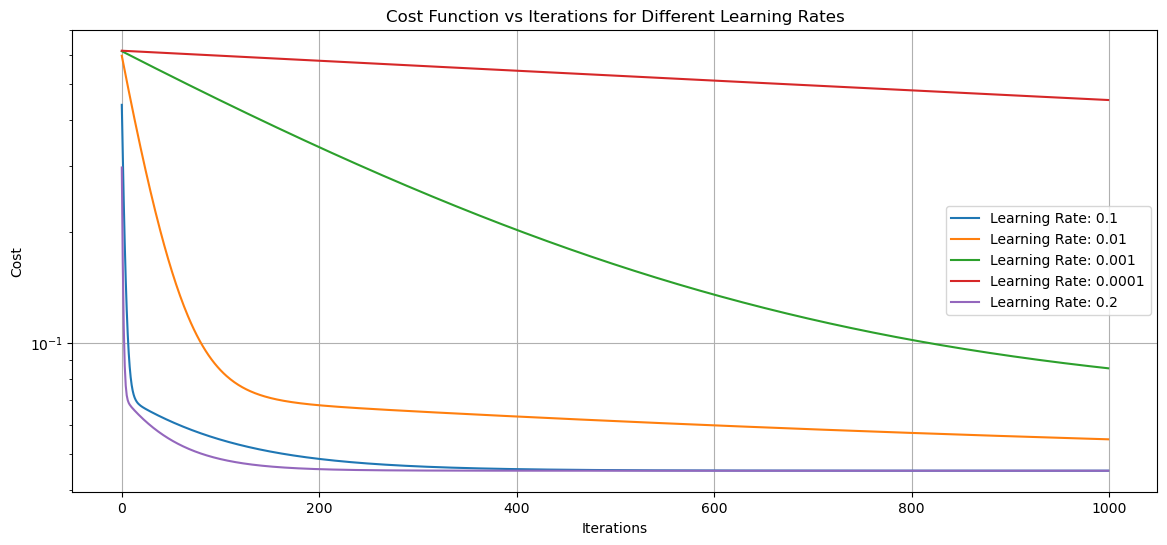

In [38]:
# Initialize data
X_train = np.random.rand(150, 3)  # 150 samples, 3 predictors
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add a column of ones for the bias
y_train = np.random.rand(150, 1)  # 150 target values reshaped to (150, 1)

# Set learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]
num_iterations = 1000

# Initialize plot
plt.figure(figsize=(14, 6))

# Iterate over each learning rate and perform gradient descent
for lr in learning_rates:
    weights = initialize_weights(X_train.shape[1])  # Initialize weights
    _, cost_history = grad_descent(X_train, y_train, weights, lr, num_iterations)
    
    # Plot the cost function
    plt.plot(cost_history, label=f'Learning Rate: {lr}')

# Customize the plot
plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.yscale('log') 
plt.show()

It can be observed from the graph above that the cost of the model that gradient descent generates remains high when the learning rate is too low, like 0.0001 or 0.001. In contrast, the cost function returns drastically and is not the right learning rate for the number of iterations given when the learning rate is too high, such as 0.2 or 0.1, since it takes a lot of a step on each iteration. The costs vary gradually with each iteration if the learning rate is precisely appropriate, 0.01 for this dataset, and we can observe how the cost decreases with each iteration until it achieves a significant minimum.

## 5. Is there a relationship on the learning rate and the number of iterations?

There is a clear relationship on the learning rate and the number of iterations. It can be seen that if the learning rate is too low, you will need more iterations to properly reduce the errors which can be time-consuming and computationally expensive. On the other hand, if the learning rate is too high, it may lead to overshooting in which the model will skip over the optimal point of minimum error and could result in divergent behavior of the model. 

Therefore, it is advisable to begin with a high learning rate and gradually decrease the value as the weights approach the local minimum.

Reference: Jordan, J. (2018, March 1). Setting the learning rate of your neural network. Jeremy Jordan. https://www.jeremyjordan.me/nn-learning-rate/
‌


## 6. Compare the results with the results of ordinary least squares function.

In [43]:
# Using scikit-learn's LinearRegression for OLS
ols_model = LinearRegression()
ols_model.fit(X_standardized, y)
ols_predictions = ols_model.predict(X_standardized)

# Predictions from Gradient Descent
gd_predictions = predict(X_standardized, final_weights)

# Metrics
gd_mse = mean_squared_error(y, gd_predictions)
gd_r2 = r2_score(y, gd_predictions)
ols_mse = mean_squared_error(y, ols_predictions)
ols_r2 = r2_score(y, ols_predictions)

# Print weights and metrics for comparison
print("Final weights from Gradient Descent:", final_weights)
print("Coefficients from OLS (scikit-learn):", ols_model.coef_)
print("Intercept from OLS (scikit-learn):", ols_model.intercept_)

print("\nMetrics Comparison:\n")
print(f"Gradient Descent MSE: {gd_mse:.5f}")
print(f"OLS MSE: {ols_mse:.5f}\n")
print(f"Gradient Descent R^2: {gd_r2:.5f}")
print(f"OLS R^2: {ols_r2:.5f}")

Predictions shape: (200, 1)
Final weights from Gradient Descent: [[14.02477267]
 [ 3.83763432]
 [ 2.79115525]
 [ 0.01635503]]
Coefficients from OLS (scikit-learn): [[ 0.          3.91925365  2.79206274 -0.02253861]]
Intercept from OLS (scikit-learn): [14.0225]

Metrics Comparison:

Gradient Descent MSE: 2.79193
OLS MSE: 2.78413

Gradient Descent R^2: 0.89692
OLS R^2: 0.89721


Both gradient descent and OLS have very similar mean square errors (MSEs) which suggests that their performance in terms of prediction accuracy is almost identical. Better predictive performance is indicated by a reduced MSE and we can see that the OLS approach has a little lower MSE but the difference is minimal.

OLS produces a little greater R^2 value than the other approa , although they are nearly equal. This indicates that both models perform quite similarly and account forpproximatelyut 89.7% of the variance in the data.